# Decision Trees & Random Forests – Theory

---

## 1. Decision Trees

### Definition
A **Decision Tree** is a supervised machine learning algorithm used for both **classification** and **regression** tasks.  
It splits the dataset into branches based on feature values, forming a **tree-like structure** of decisions.

---

### Key Idea
- The dataset is split recursively into subsets based on a feature that provides the **highest information gain** (classification) or **lowest variance (MSE)** (regression).  
- Common splitting criteria:  
  - **Gini Index**  
  - **Entropy / Information Gain**  
  - **Mean Squared Error (for regression)**

---

### Example (Classification)
Is Age > 30?

Yes → Income > 50K

No → Income ≤ 50K


---

### Applications
- Loan approval prediction  
- Medical diagnosis  
- Customer segmentation  
- Spam detection  

---

### Advantages
- Easy to interpret and visualize.  
- Handles both categorical and numerical data.  
- No feature scaling required.  

---

### Limitations
- Can easily **overfit** the training data.  
- Sensitive to noisy data.  
- Small changes in data may result in a completely different tree.  

---

# 3. Model Training
- **Decision Tree**: Grows one tree by recursively splitting nodes.  

- Both are available in `scikit-learn`:  
  - `DecisionTreeClassifier` / `DecisionTreeRegressor`  
  
  

Decision Tree Accuracy: 1.0000


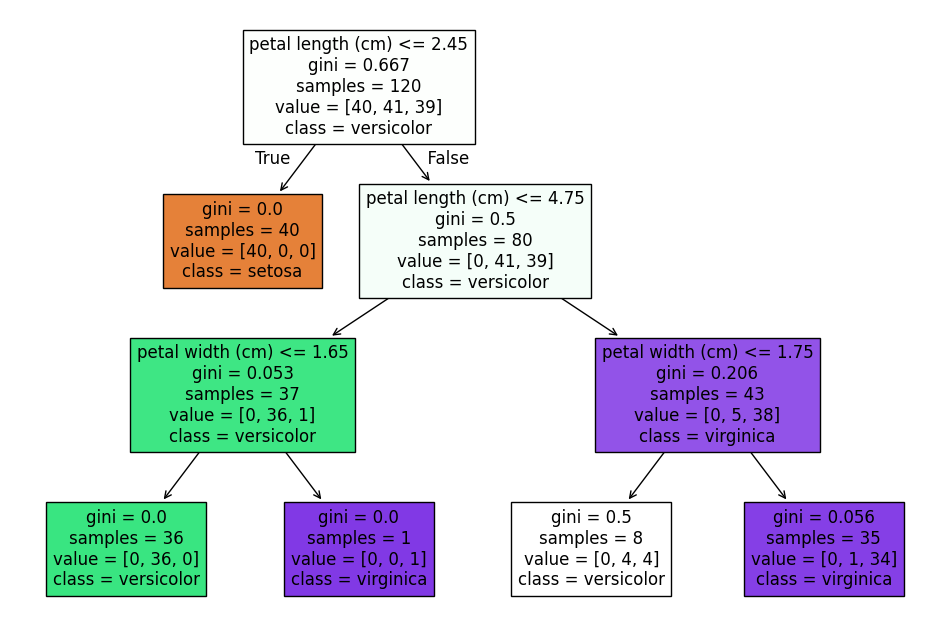

In [1]:
# ==============================
# Decision Tree Classifier (Simple)
# ==============================

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load dataset (Iris dataset for classification)
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for clarity
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = y

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train Decision Tree
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)

# 4. Predictions
y_pred = model.predict(X_test)

# 5. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {acc:.4f}")

# 6. Visualization of the tree
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


## 2. Random Forests

### Definition
A **Random Forest** is an **ensemble method** that builds multiple Decision Trees and combines their outputs to improve accuracy and reduce overfitting.  

It works on the principle of **Bagging (Bootstrap Aggregating)**:
- Train multiple trees on different random subsets of data and features.  
- Take the majority vote (classification) or average prediction (regression).

---

### Key Idea
- Random Forest reduces variance by combining many Decision Trees.  
- Each tree is trained on a **random sample of data** and uses a **random subset of features** for splitting.  

---

### Applications
- Fraud detection  
- Stock market prediction  
- Medical prognosis  
- Recommendation systems  

---

### Advantages
- Reduces overfitting compared to a single Decision Tree.  
- Works well with large datasets and high-dimensional data.  
- Provides feature importance scores.  

---

### Limitations
- Less interpretable than a single Decision Tree.  
- Can be computationally expensive for very large datasets.  

---

## 3. Model Training
- **Decision Tree**: Grows one tree by recursively splitting nodes.  
- **Random Forest**: Grows multiple trees on random subsets and combines results.  
- Both are available in `scikit-learn`:  
  - `DecisionTreeClassifier` / `DecisionTreeRegressor`  
  - `RandomForestClassifier` / `RandomForestRegressor`

Random Forest Accuracy: 1.0000

Feature Importances:
              Feature  Importance
2  petal length (cm)    0.450058
3   petal width (cm)    0.423620
0  sepal length (cm)    0.105099
1   sepal width (cm)    0.021224


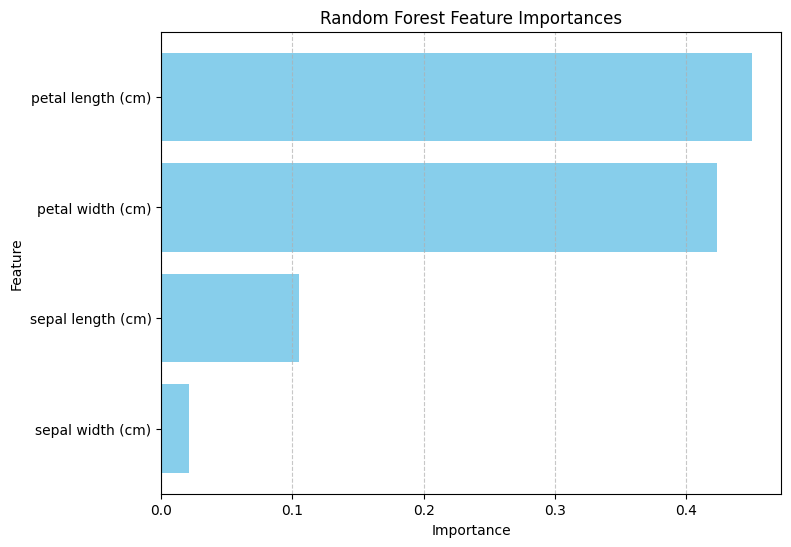

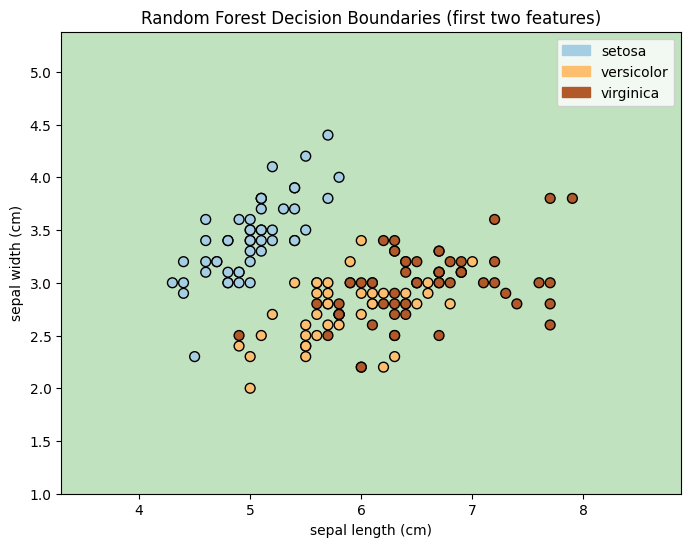

In [2]:
# ==============================
# Random Forest Classifier with Full Visualization
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load dataset (Iris dataset for classification)
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for clarity
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = y

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,  # number of trees
    max_depth=4,       # maximum depth of each tree
    random_state=42
)
rf_model.fit(X_train, y_train)

# 4. Predictions
y_pred = rf_model.predict(X_test)

# 5. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc:.4f}")

# 6. Feature Importance
feature_importances = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)

# ==============================
# 7. Visualization
# ==============================

# 7a. Feature Importance Bar Plot
plt.figure(figsize=(8,6))
plt.barh(
    feature_importances['Feature'],
    feature_importances['Importance'],
    color='skyblue'
)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # largest importance on top
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# 7b. Decision Boundaries Plot using first two features
X_plot = X[:, :2]  # use first two features for 2D visualization
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on grid: set other features to their mean
X_grid = np.c_[xx.ravel(), yy.ravel(),
               np.full_like(xx.ravel(), X[:,2].mean()),
               np.full_like(xx.ravel(), X[:,3].mean())]

Z = rf_model.predict(X_grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Scatter plot for actual points
scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.Paired)

# Legend
handles = [Patch(color=plt.cm.Paired(i / 2), label=iris.target_names[i]) for i in range(3)]
plt.legend(handles=handles)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Random Forest Decision Boundaries (first two features)')
plt.show()


In [4]:
# ================================
# Decision Tree Regression - Student Performance (One Cell)
# ================================

# 1. Upload kaggle.json
from google.colab import files
files.upload()

# 2. Setup Kaggle API
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# 3. Download Dataset
!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression

# 4. Unzip Dataset
!unzip -o student-performance-multiple-linear-regression.zip

# 5. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# 6. Load Dataset
df = pd.read_csv("Student_Performance.csv")

# 7. Preprocessing
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
        'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 9. Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# 10. Prediction
y_pred = dt_model.predict(X_test)

# 11. Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test.values, y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red'
)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.show()

# 12. Visualize Decision Tree
plt.figure(figsize=(200,100))
tree.plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True
)
plt.show()


Output hidden; open in https://colab.research.google.com to view.